# Overlapping-generations model (OLG)

## Steady-state equilibrium


### Household problem ($N$ identical households)

- Households choose consumption & savings:
    $$
    \begin{aligned}
    \max_{c_y,~c_o,~a} \enskip & \Bigl\{ u(c_y) + \beta u(c_o) \Bigr\} \\
    \text{s.t.} \quad c_y + a &= w \\
                    c_o &= (1+r)a \\
        c_y &\geq 0, ~ c_o \geq 0,~ a \geq 0
    \end{aligned}
    $$

-   Flow utility:
    $$
    u(c) = \begin{cases}
        \frac{c^{1-\gamma}}{1-\gamma} & \text{if } \gamma \neq 1 \\
        \log(c) & \text{if } \gamma = 1
        \end{cases}
    $$

-   Choice variables:

    -   $c_y$:  Consumption when young
    -   $c_o$:  Consumption when old
    -   $a$:    Savings when young

- Parameters:

    -   $\beta$: Discount factor
    -   $\gamma$: Relative risk aversion
    -   Each household inelastically supplies 1 unit of labor when young

- Prices (taken as given, competitive equilibrium):

    -   $r$: Interest rate (return on capital)
    -   $w$: Wage rate


#### Analytical solution

-   Optimal **savings rate** of the young:
    <a id='olg-hh-srate'></a>
    $$
    \tag{1}
    s = \frac{1}{1 + \beta^{-\frac{1}{\gamma}} (1+r)^{1-\frac{1}{\gamma}}}
    $$
- Optimal **savings** of the young:
    $$
    a = s \cdot w
    $$

***
### Firm problem (representative firm)

- Firm problem:
    $$
    \max_{K,~L} \enskip \Pi = 
        \underbrace{z K^{\alpha} L^{1-\alpha}}_{\text{Output } Y}
         - \underbrace{(r + \delta) K}_{\text{Cost of capital}} 
         - \underbrace{w L}_{\text{Cost of labor}}
    $$

- Choice variables:

    - $K$: Capital
    - $L$: Labor

- Parameters:

    - $\alpha$: Capital share (or elasticity with respect to capital)
    - $\delta$: Capital depreciation rate
    - $z$: Total factor productivity (TFP)

- Prices (taken as given, competitive equilibrium):

    -   $r$: Return on capital
    -   $w$: Wage rate

- First-order conditions:
    <a id='olg-firm-prices'></a>
    $$
    \tag{2}
    \begin{aligned}
    r + \delta &= \alpha z \left(\frac{K}{L}\right)^{\alpha-1} = \alpha z k^{\alpha-1} \\
    w &= (1-\alpha) z\left(\frac{K}{L}\right)^{\alpha} = (1-\alpha) z k^{\alpha}
    \end{aligned}
    $$
    where $k \equiv \frac{K}{L}$ is the capital-labor ratio.



***
### Equilibrium

Set of quantities $(K,L,Y,c_o,c_y,a)$ and prices $(r,w)$ such that:

- Asset market: $K = N a$
- Labor market: $L = N$
- Goods market: $Y + (1-\delta)K = N(c_y + c_o + a)$


***
### Numerical solution

#### Solution algorithm

1. Define parameters

2. Function to compute **prices** $(r,w)$ for a given $k$ 
    (use firm's first-order conditions [(1)](#olg-firm-prices)).

3.  Function to solve the household problem for given $r$ and return
    the **savings rate $s$** (use analytical solution [(2)](#olg-hh-srate))

4.  Function $f(k)$ to compute **excess demand for capital** $K - Na$
    for given $k$.

    Use the functions defined in steps (2) and (3) for this purpose.

5.  Call a root-finder to locate the root $k^*$ of $f$, $f(k^*) = 0$

6.  Compute and store all other equilibrium quantities and prices given equilibrium $k^*$.

#### Implementation

- See [`lecture07_olg.py`](lecture07_olg.py) for full implementation

In [1]:
# Enable automatic reloading of external modules
%load_ext autoreload
%autoreload 2

##### Step 1: Define parameters

In [ ]:
from dataclasses import dataclass



@dataclass
class Parameters:
    """









    Parameters for the OLG model.
    """


    alpha: float = 0.36  # Capital share in production function

    delta: float = 1.0  # Depreciation rate (full depreciation)

    z: float = 1.0  # TFP

    beta: float = 0.96**30  # Discount factor (0.96 per year, 30-year periods)

    gamma: float = 2.0  # RRA in utility

    N: int = 1  # Number of households per cohort

In [3]:
# Create parameter instance
par = Parameters()

##### Step 2: Compute equilibrium prices from $k$

In [4]:
def compute_prices(k, par: Parameters):
    """
    Return factor prices for a given capital-labor ratio and parameters.

    Parameters
    ----------
    k : float
        Capital-labor ratio
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    r : float
        Return on capital after depreciation (interest rate)
    w : float
        Wage rate

    """
    r = par.alpha * par.z * (k) ** (par.alpha - 1) - par.delta
    w = (1 - par.alpha) * par.z * (k) ** (par.alpha)
    return r, w

##### Step 3: Solve the household problem

In [5]:
def compute_savings_rate(r, par: Parameters):
    """
    Compute the savings rate using the analytical solution
    to the household problem.

    Parameters
    ----------
    r : float
        Return on capital
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    s : float
        Savings rate
    """

    s = 1 / (1 + par.beta ** (-1 / par.gamma) * (1 + r) ** (1 - 1 / par.gamma))
    return s

<div class="alert alert-info">
<h3> Your turn</h3>

Plot the households's optimal savings rate <i>s</i> returned by <tt>compute_savings_rate()</tt> 
for <tt>r</tt> on the interval [0.01, 0.2]. Does the shape intuitively make sense (given the parameter for the risk aversion γ)?
</div>

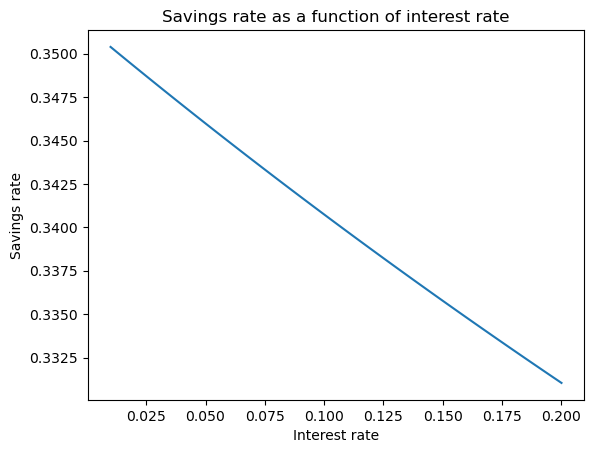

In [7]:
# Plot the household savings rate s returrned by compute_savings_rate()
# for r on the interval [0.01, 0.2]. Does the shape intuitively make sense
# (given the parameter for risk aversion gamma)?
import numpy as np
import matplotlib.pyplot as plt

r_vals = np.linspace(0.01, 0.2, 100)
s_vals = np.empty_like(r_vals)
for i, r in enumerate(r_vals):
    s_vals[i] = compute_savings_rate(r, par)

fig, ax = plt.subplots()
ax.plot(r_vals, s_vals)
ax.set_xlabel("Interest rate")
ax.set_ylabel("Savings rate")
ax.set_title("Savings rate as a function of interest rate")
plt.show()

In [8]:
# As interest rate increases, the savings rate decreases.
# This is consistent with the risk aversion parameter gamma = 2.0.

##### Step 4: Compute excess capital demand

In [9]:
def compute_capital_ex_demand(k, par: Parameters):
    """
    Compute the excess demand for capital.

    Parameters
    ----------
    k : float
        Capital-labor ratio
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    ex_demand : float
        Excess demand for capital
    """

    r, w = compute_prices(k, par)
    s = compute_savings_rate(r, par)
    A = s * w * par.N
    L = par.N
    K = k * L
    ex_demand = K - A

    return ex_demand

<div class="alert alert-info">
<h3> Your turn</h3>

Using the code we just wrote, plot the function <tt>compute_capital_ex_demand()</tt> for 50 points of 
<tt>k</tt> which are uniformly spaced on the interval [0.01, 1].

</div>

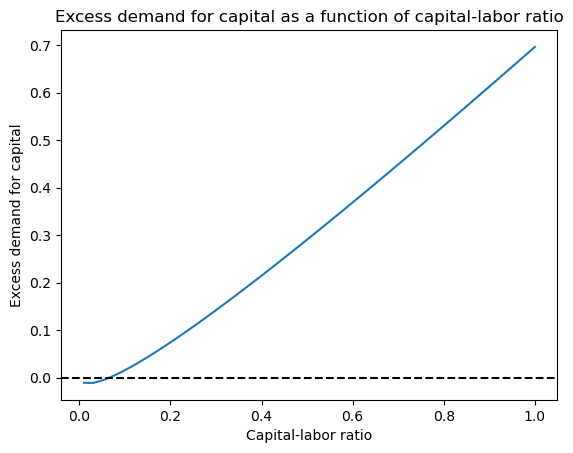

In [10]:
# Plot the function compute_capital_ex_demand() for 50 points of k
# on the interval [0.01, 1].

k_vals = np.linspace(0.01, 1, 50)
ex_demand_vals = np.empty_like(k_vals)

for i, k in enumerate(k_vals):
    ex_demand_vals[i] = compute_capital_ex_demand(k, par)

fig, ax = plt.subplots()
ax.plot(k_vals, ex_demand_vals)
ax.axhline(0, color="black", linestyle="--")
ax.set_xlabel("Capital-labor ratio")
ax.set_ylabel("Excess demand for capital")
ax.set_title("Excess demand for capital as a function of capital-labor ratio")
plt.show()

##### Step 5: Call the root-finder

- Use 
[`root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html)
- Use `method='brentq'` (the default) and specify initial bracket

In [12]:
from scipy.optimize import root_scalar

# Initial bracket for k used by root-finder
bracket = (1.0e-3, 1)

# Call root-finder. Pass Parameters using args argument.
res = root_scalar(compute_capital_ex_demand, bracket=bracket, args=(par,))

In [13]:
res

      converged: True
           flag: converged
 function_calls: 14
     iterations: 13
           root: 0.06615197337785264
         method: brentq

##### Step 6: Compute remaining equilibrium quantities

- Store equilibrium quantities & prices in `SteadyState` instance

In [14]:
@dataclass
class SteadyState:
    """
    Steady-state equilibrium of the OLG model.
    """

    par: Parameters = None  # Parameters used to compute equilibrium
    c_y: float = None  # Consumption when young
    c_o: float = None  # Consumption when old
    a: float = None  # Savings when young
    s: float = None  # Savings rate when young
    r: float = None  # Interest rate (return on capital)
    w: float = None  # Wage rate
    K: float = None  # Aggregate capital stock
    L: float = None  # Aggregate labor demand
    I: float = None  # Aggregate investment
    Y: float = None  # Aggregate output

- Write function `compute_steady_state()` to find equilibrium and compute remaining quantities & prices

In [17]:
def compute_steady_state(par: Parameters):
    """
    Compute the steady-state equilibrium for the OLG model.

    Parameters
    ----------
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    eq : SteadyState
        Steady state equilibrium of the OLG model
    """

    # Find the equilibrium k=K/L with a root-finder. Excess demand for capital
    # has to be zero in equilibrium.
    res = root_scalar(compute_capital_ex_demand, bracket=(1.0e-3, 1), args=(par,))

    if not res.converged:
        print("Equilibrium root-finder did not terminate successfully")

    # Equilibrium K
    K = res.root * par.N

    # Create instance of equilibrium class
    eq = SteadyState(par=par, K=K, L=par.N)

    # Equilibrium prices
    eq.r, eq.w = compute_prices(eq.K / eq.L, par)

    # Investment in steady state
    eq.I = eq.K * par.delta

    # Equilibrium household choices
    eq.s = compute_savings_rate(eq.r, par)
    eq.a = eq.s * eq.w
    eq.c_y = eq.w - eq.a
    eq.c_o = (1 + eq.r) * eq.a

    # Equilibrium output
    eq.Y = par.z * eq.K**par.alpha * eq.L ** (1 - par.alpha)

    # Aggregate consumption
    C = par.N * (eq.c_y + eq.c_o)
    # Check that goods market clearing holds using Y = C + I
    assert (
        abs(eq.Y - C - eq.I) < 1.0e-8
    )  # Assert command is used to check if the condition is true. If it is not true, the program will stop and give an error message.

    return eq

In [18]:
eq = compute_steady_state(par)

- Print equilibrium using `print_steady_state()` from [`lecture07_olg`](lecture07_olg.py) module

In [19]:
from lecture07_olg import print_steady_state

# Compute equilibrium, return SteadyState instance
eq = compute_steady_state(par)

# Print equilibrium allocation & prices
print_steady_state(eq)

Steady-state equilibrium:
  Households:
    c_y = 0.17460
    c_o = 0.13542
    a = 0.06615
  Firms:
    K = 0.06615
    L = 1.00000
    Y = 0.37618
  Prices:
    r = 1.04718
    w = 0.24076
  Market clearing:
    Capital market: -6.93889e-17
    Goods market: 1.66533e-16


<div class="alert alert-info">
<h3> Your turn</h3>

You are interested in how the equilibrium prices depend on the cohort size <i>N</i>. Plot the equilibrium prices <i>r</i> and <i>w</i> when varying <i>N</i> over the range of integers from 1 to 10.

</div>

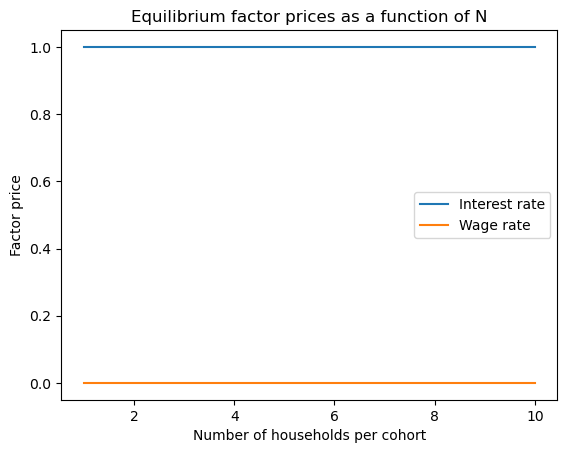

In [ ]:
# Plot the equilibrium prices r and w when varying N over the range of integers from 1 to 10.

N_vals = np.arange(1, 11)
r_vals = np.empty_like(N_vals)
w_vals = np.empty_like(N_vals)

for i, N in enumerate(N_vals):
    par.N = N
    eq = compute_steady_state(par)
    r_vals[i] = eq.r
    w_vals[i] = eq.w

fig, ax = plt.subplots()
ax.plot(N_vals, r_vals, label="Interest rate")
ax.plot(N_vals, w_vals, label="Wage rate")
ax.set_xlabel("Number of households per cohort")
ax.set_ylabel("Factor price")
ax.legend()
ax.set_title("Equilibrium factor prices as a function of N")
plt.show()

***
## Transition dynamics

- How does economy evolve after **unanticipated** shocks?
- Scenario:

    1.  Economy is in steady-state equilibrium
    2.  Economy is hit by a shock to TFP

        -   Examine permanent shock here, transitory/persistent shocks in optional exercises

    3.  Compute transition path to new steady state
    
-   Households have perfect foresight about evolution of all variables once shock is realized (full information rational expectations)



***
### Household problem ($N$ identical households)

- Households choose consumption & savings:
    $$
    \begin{aligned}
    \max_{c_{y,t},~c_{o,t+1},~a_t} \enskip & \Bigl\{ u(c_{y,t}) + \beta u(c_{o,t+1}) \Bigr\} \\
    \text{s.t.} \quad c_{y,t} + a_t &= w_t \\
                    c_{o,t+1} &= (1+r_{t+1})a_t \\
        c_{y,t} &\geq 0, ~ c_{o,t+1} \geq 0,~ a_t \geq 0 \enskip \text{for all } t
    \end{aligned}
    $$

-   Choice variables:

    -   $c_{y,t}$:  Consumption when young
    -   $c_{o,t+1}$:  Consumption when old
    -   $a_t$:    Savings when young

- Prices (taken as given, competitive equilibrium):

    -   $r_{t+1}$: Interest rate (return on capital)
    -   $w_t$: Wage rate

#### Analytical results

-   General CRRA preferences:

    -   Savings rate depends on next-period $r_{t+1}$
        <a id='olg-trans-srate'></a>
        $$
        \tag{3}
        s_t = \left[ 1 + \beta^{-\frac{1}{\gamma}} (1+r_{t+1})^{1-\frac{1}{\gamma}}\right]^{-1}
        $$

    -   Next-period $r_{t+1}$ depends on savings rate $s_t$:
        $$
        r_{t+1} = \alpha z_{t+1} \left(\frac{K_{t+1}}{N}\right)^{\alpha-1}  - \delta = \alpha z_{t+1} \left( s_t  w_t \right)^{\alpha-1} - \delta
        $$

    -   **Is this a problem?**

-   Simplifying assumption: $\gamma = 1$
    $$
    s_t = \frac{\beta}{1+\beta}
    $$

-   See optional exercises to a solution with general CRRA preferences

***
### Equilibrium

Set of quantities $(K_t,L_t,Y_t,c_{o,t},c_{y,t},a_t)$ and prices $(r_t,w_t)$ such that:

- Asset market: $K_t = N a_{t-1}$
- Labor market: $L_t = N$
- Goods market: $Y_t + (1-\delta)K_t = N(c_{y,t} + c_{o,t} + a_t)$


***
### Transition path

Timeline of events:

- Period $t=0$: The economy is in the steady state with $K_0 = K^*$, $w_0 = w^*$, $a_0 = a^*$ etc.
- Period $t \geq 1$:
    -   The capital stock is pre-determined from the previous period, $K_t = N a_{t-1}$
    -   Production takes place:
        -   Young households earn $w_t = (1-\alpha) z_t (K_t / L)^{\alpha}$
        -   Old households earn gross asset returns $(1+r_t)a_{t-1}$ with $r_t = \alpha z_t (K_t / L)^{\alpha -1} - \delta$
    -   Consumption and savings:
        - Young households save $a_t = s w_t$ and consume $c_{y,t} = (1-s) w_t$
        - Old households consume $c_{o,t} = (1+r_t) a_{t-1}$


***
### Numerical implementation


1.  Define `Simulation` class to store simulation results
2.  Set model parameter & compute pre-shock steady state as starting point
3.  Implement function to perform simulation 
4.  Run simulation
5.  Plot simulated trajectories for selected variables

#### Step 1: `Simulation` class

In [21]:
import numpy as np


@dataclass
class Simulation:
    c_y: np.ndarray = None  # Time series for consumption when young
    c_o: np.ndarray = None  # Time series for consumption when old
    a: np.ndarray = None  # Time series for savings when young
    s: np.ndarray = None  # Time series for savings rate when young
    r: np.ndarray = None  # Time series for interest rate (return on capital)
    w: np.ndarray = None  # Time series for wages
    K: np.ndarray = None  # Time series for aggregate capital stock
    Y: np.ndarray = None  # Time series for aggregate output
    z: np.ndarray = None  # Time series for TFP

#### Step 2: Initial steady state

-   Need to use $\gamma = 1$
-   Use functions defined earlier to compute and report steady state

In [22]:
# Parameter instance with risk aversion gamma=1
par = Parameters(gamma=1)

# Compute equilibrium at original TFP level
eq_init = compute_steady_state(par)

# Print initial equilibrium
print_steady_state(eq_init)

Steady-state equilibrium:
  Households:
    c_y = 0.16717
    c_o = 0.12167
    a = 0.04912
  Firms:
    K = 0.04912
    L = 1.00000
    Y = 0.33796
  Prices:
    r = 1.47669
    w = 0.21630
  Market clearing:
    Capital market: -1.98591e-14
    Goods market: 4.92384e-14


#### Step 3: Implement simulation

In [ ]:
import copy  # Copy module is used to create a copy of the object.
from lecture07_olg import initialize_sim


def simulate_olg(z_new, eq: SteadyState, T=10):
    """







    Simulate the transition dynamics of the overlapping generations model.








    Parameters
    ----------







    z_new : float







        New level of TFP after the shock.







    eq : SteadyState







        Initial steady-state equilibrium before the shock.







    T : int







        Number of periods to simulate.








    Returns
    -------







    sim : Simulation







        Simulation object containing the time series for each variable.







    """

    # Retrieve parameter object attached to steady-state equilibrium
    par = eq.par

    # The following code only works for log utility
    if par.gamma != 1:
        raise ValueError("Simulation only implemented for log utility")

    # Initialize simulation instance and allocate arrays
    sim = initialize_sim(T, eq)

    # TFP is assumed to be at new level for all remaining periods
    sim.z[1:] = z_new

    # Copy parameters to avoid changing the original instance
    par_ = copy.copy(par)

    # Savings rate is independent of r for gamma = 1 and constant over time
    s = par.beta / (1 + par.beta)
    sim.s[:] = s

    for t in range(1, T + 1):
        # Update TFP with current value
        par_.z = sim.z[t]

        # Capital stock is predetermined by savings of old in previous period
        sim.K[t] = sim.a[t - 1] * par.N

        # Prices given predetermined capital stock and current z
        sim.r[t], sim.w[t] = compute_prices(sim.K[t] / par.N, par_)

        # Savings by the young
        sim.a[t] = s * sim.w[t]
        # Consumption by the young
        sim.c_y[t] = (1 - s) * sim.w[t]
        # Consumption by the old
        sim.c_o[t] = (1 + sim.r[t]) * sim.a[t - 1]
        # Aggregate output
        sim.Y[t] = sim.z[t] * sim.K[t] ** par.alpha * par.N ** (1 - par.alpha)

        # Verify that goods market clearing holds
        demand = par.N * (sim.c_y[t] + sim.c_o[t] + sim.a[t])
        supply = sim.Y[t] + (1 - par.delta) * sim.K[t]
        assert abs(demand - supply) < 1.0e-8

    return sim

#### Step 4: Run simulation

In [33]:
# Number of periods to simulate
T = 20

# New TFP level (10% drop from steady state)
z_new = 0.9 * par.z

# Perform simulation
sim = simulate_olg(z_new, eq_init, T=T)

In [34]:
# Compute new steady state using new TFP level
eq_new = compute_steady_state(par=Parameters(gamma=par.gamma, z=z_new))

# Print new steady state (transition end point)
print_steady_state(eq_new)

Steady-state equilibrium:
  Households:
    c_y = 0.14180
    c_o = 0.10320
    a = 0.04167
  Firms:
    K = 0.04167
    L = 1.00000
    Y = 0.28666
  Prices:
    r = 1.47669
    w = 0.18346
  Market clearing:
    Capital market: -1.22541e-14
    Goods market: 3.04201e-14


#### Step 5: Plot simulation & new steady state

- Compute new steady state (where economy transitions to)

- Plot impulse-response functions (IRFs) for selected variables as % deviation from initial steady state

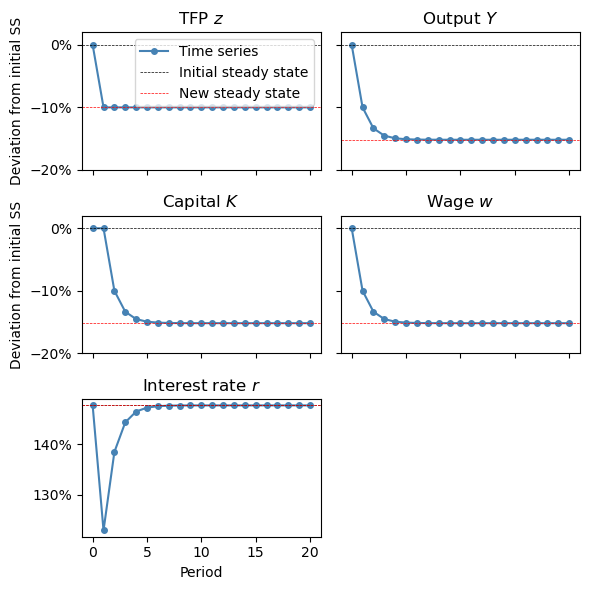

In [ ]:
from lecture07_olg import plot_simulation

# Plot impulse responses for selected variables
plot_simulation(eq_init, sim, eq_new=eq_new)

<div class="alert alert-info">
<h3> Your turn</h3>

As a robustness check, verify that the simulated trajectories are <i>constant</i> if the new TFP level is unchanged from the initial TFP level.

</div>

## Optional exercise 1

In [36]:
from lecture07_olg import (
    SteadyState,
    Parameters,
    compute_steady_state,
    compute_prices,
    initialize_sim,
    plot_simulation,
)

In [38]:
import numpy as np
import copy


def simulate_olg(z_series, eq: SteadyState):
    """
    Simulate the transition dynamics of the overlapping generations model
    using a given time series for TFP.

    Parameters
    ----------
    z_series : np.array
        Time series of TFP levels to be used for simulation.
    eq : SteadyState
        Initial steady-state equilibrium before the shock.
    T : int
        Number of periods to simulate.

    Returns
    -------
    sim : Simulation
        Simulation object containing the time series for each variable.
    """

    # Retrieve parameter object attached to steady-state equilibrium
    par = eq.par

    # The following code only works for log utility
    if par.gamma != 1:
        raise ValueError("Simulation only implemented for log utility")

    # Number of periods to simulate (excluding initial period)
    T = len(z_series) - 1

    # Initialize simulation instance and allocate arrays
    sim = initialize_sim(T, eq)

    # Set TFP series
    sim.z[:] = z_series

    # Copy parameters to avoid changing the original instance
    par_ = copy.copy(par)

    # Savings rate is independent of r for gamma = 1 and constant over time
    s = par.beta / (1 + par.beta)
    sim.s[:] = s

    for t in range(1, T + 1):
        # Update TFP with current value
        par_.z = sim.z[t]

        # Capital stock is predetermined by savings of old in previous period
        sim.K[t] = sim.a[t - 1] * par.N

        # Prices given previous-period capital stock
        sim.r[t], sim.w[t] = compute_prices(sim.K[t] / par.N, par_)

        # Savings by the young
        sim.a[t] = s * sim.w[t]
        # Consumption by the young
        sim.c_y[t] = (1 - s) * sim.w[t]
        # Consumption by the old
        sim.c_o[t] = (1 + sim.r[t]) * sim.a[t - 1]
        # Aggregate output
        sim.Y[t] = sim.z[t] * sim.K[t] ** par.alpha * par.N ** (1 - par.alpha)

        # Verify that goods market clearing holds
        demand = par.N * (sim.c_y[t] + sim.c_o[t] + sim.a[t])
        supply = sim.Y[t] + (1 - par.delta) * sim.K[t]
        assert abs(demand - supply) < 1.0e-8

    return sim

#### Scenario (1): Transitory TFP shock

For this scenario, we create a TFP array of 51 elements and set these all to the steady-state TFP level $z=1$, except for the value in period $t=2$, which is set 10% lower.Scenario 1

In [39]:
# Parameter instance with risk aversion gamma=1
par = Parameters(gamma=1)

# Number of periods to simulate
T = 50

# TFP series with a one-time drop in TFP
z_series = np.full(T + 1, fill_value=par.z)
z_series[1] = 0.9 * par.z

# Steady state equilibrium (initial and terminal)
eq = compute_steady_state(par)

# Perform simulation
sim = simulate_olg(z_series, eq)

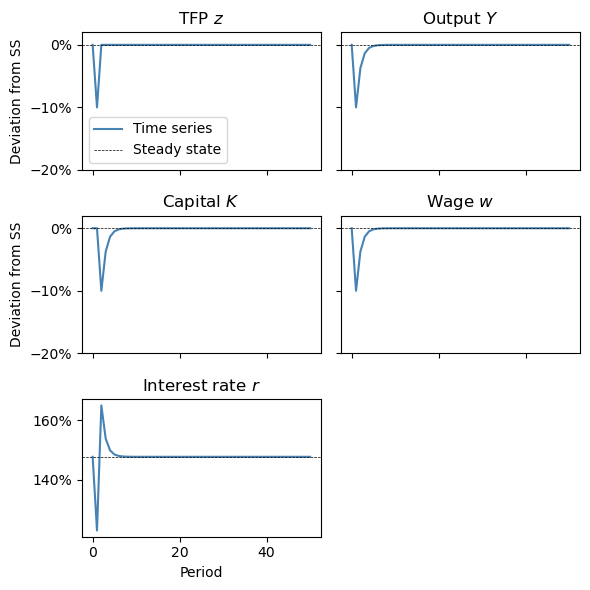

In [40]:
plot_simulation(eq, sim)

#### Scenario (2): Geometrically decaying TFP shock

For this scenario, we apply the law-of-motion for $z_t$ given above to get a TFP shock which decays geometrically and eventually reverts to its steady-state level.

In [41]:
# Decay parameter
kappa = 0.1

# Create TFP series with exponential decay
z_series = np.empty(T + 1)
z_series[0] = par.z
z_series[1] = 0.9 * par.z
for t in range(2, T + 1):
    z_series[t] = (1 - kappa) * z_series[t - 1] + kappa * par.z

# Steady state equilibrium (initial and terminal)
eq = compute_steady_state(par)

# Perform simulation
sim = simulate_olg(z_series, eq)

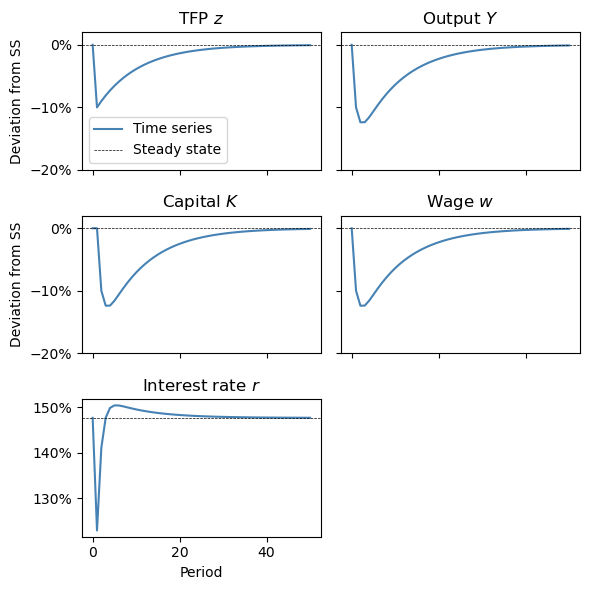

In [43]:
plot_simulation(eq, sim)

# Exercise 2    

In [45]:
from lecture07_olg import (
    SteadyState,
    Parameters,
    compute_steady_state,
    initialize_sim,
    plot_simulation,
)

In [46]:
def compute_prices(k, z, par: Parameters):
    """
    Return factor prices for a given capital-labor ratio, TFP, and parameters.

    Parameters
    ----------
    k : float
        Capital-labor ratio
    z : float
        TFP
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    r : float
        Return on capital after depreciation (interest rate)
    w : float
        Wage rate

    """

    # Return on capital after depreciation (interest rate)
    r = par.alpha * z * k ** (par.alpha - 1) - par.delta

    # Wage rate
    w = (1 - par.alpha) * z * k**par.alpha

    return r, w

In [47]:
def euler_err(s, w, z_next, par: Parameters):
    """
    Compute the euler equation error for a given savings rate.

    Parameters
    ----------
    s : float
        Savings rate
    w : float
        Wage rate today
    z_next : float
        TFP tomorrow
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    err : float
        Euler equation error for given s
    """

    # Savings by the young TODAY (= capital of the old TOMORROW)
    a = s * w

    # Capital-labor ratio TOMORROW
    k_next = a

    # Compute TOMORROW's prices from firm's FOCs
    r_next, _ = compute_prices(k_next, z_next, par)

    # Consumption by the young
    c_y = (1 - s) * w
    # Consumption by the old
    c_o = (1 + r_next) * a

    # Left-hand side of Euler equation
    lhs = c_y ** (-par.gamma)
    # Right-hand side of Euler equation
    rhs = par.beta * (1 + r_next) * c_o ** (-par.gamma)

    # Euler equation error
    err = lhs - rhs

    return err

In [48]:
import numpy as np
from scipy.optimize import root_scalar


def simulate_olg_crra(z_series, eq: SteadyState):
    """
    Simulate the transition dynamics of the OLG model
    using a given time series for TFP for arbitrary RRA parameters.

    Parameters
    ----------
    z_series : np.array
        Time series of TFP levels to be used for simulation.
    eq : SteadyState
        Initial steady-state equilibrium before the shock.
    T : int
        Number of periods to simulate.

    Returns
    -------
    sim : Simulation
        Simulation object containing the time series for each variable.
    """

    # Retrieve parameter object attached to steady-state equilibrium
    par = eq.par

    # Number of periods to simulate (excluding initial period and terminal period)
    T = len(z_series) - 2

    # Initialize simulation instance and allocate arrays
    sim = initialize_sim(T, eq)

    # Set TFP series
    sim.z = z_series

    for t in range(1, T + 1):
        # Capital stock is predetermined by savings of old in previous period
        sim.K[t] = sim.a[t - 1] * par.N

        # Prices given current capital stock and current TFP
        sim.r[t], sim.w[t] = compute_prices(sim.K[t] / par.N, sim.z[t], par)

        # Additional arguments for euler_err()
        args = (sim.w[t], sim.z[t + 1], par)

        # Find savings rate that satisfies the Euler equation
        res = root_scalar(euler_err, bracket=(0.001, 0.999), args=args)

        if not res.converged:
            print(f"Root-finder did not converge at t={t}")

        # Savings rate
        sim.s[t] = res.root
        # Savings by the young
        sim.a[t] = sim.s[t] * sim.w[t]
        # Consumption by the young
        sim.c_y[t] = (1 - sim.s[t]) * sim.w[t]
        # Consumption by the old
        sim.c_o[t] = (1 + sim.r[t]) * sim.a[t - 1]
        # Aggregate output
        sim.Y[t] = sim.z[t] * sim.K[t] ** par.alpha * par.N ** (1 - par.alpha)

        # Verify that goods market clearing holds
        demand = par.N * (sim.c_y[t] + sim.c_o[t] + sim.a[t])
        supply = sim.Y[t] + (1 - par.delta) * sim.K[t]
        assert abs(demand - supply) < 1.0e-8

    return sim

In [49]:
# Parameter instance with default values (gamma = 2)
par = Parameters()

# Number of periods to simulate
T = 50

# Decay parameter
kappa = 0.1

# Create TFP series with exponential decay (with one additional period!)
z_series = np.empty(T + 2)
z_series[0] = par.z
z_series[1] = 0.9 * par.z
for t in range(2, T + 2):
    z_series[t] = (1 - kappa) * z_series[t - 1] + kappa * par.z

# Steady state equilibrium (initial and terminal)
eq = compute_steady_state(par)

# Perform simulation
sim = simulate_olg_crra(z_series, eq)

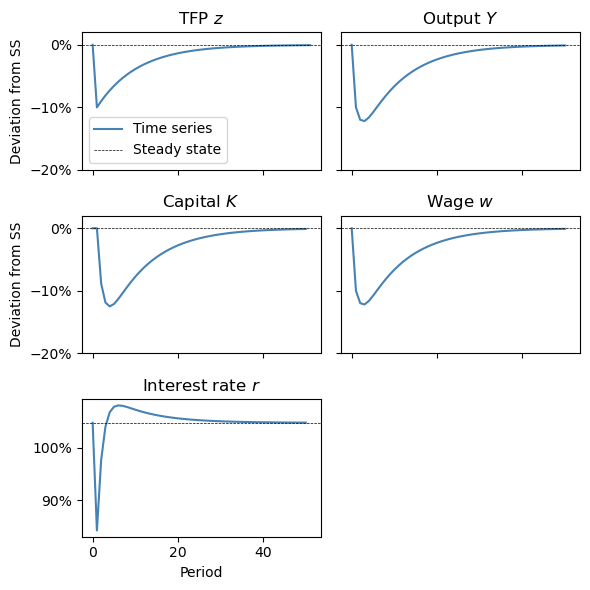

In [50]:
plot_simulation(eq, sim)